In [7]:
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [9]:
##GG web site data
bronze_df = pd.read_csv("gg_datafiles/bronze.csv", encoding="utf-8")
gold_df = pd.read_csv("gg_datafiles/gold.csv", encoding="utf-8")
platinum_df = pd.read_csv("gg_datafiles/platinum.csv", encoding="utf-8")
platinumplus_df = pd.read_csv("gg_datafiles/platinumplus.csv", encoding="utf-8")
silver_df = pd.read_csv("gg_datafiles/silver.csv", encoding="utf-8")

In [18]:
bronze_df["League"] = "Bronze"
gold_df["League"] = "Gold"
platinum_df["League"] = "Platinum"
platinumplus_df["League"] = "Platinum Plus"
silver_df["League"] = "Silver"

188

In [21]:
stack_df = pd.concat([bronze_df, 
                      gold_df, 
                      platinum_df, 
                      platinumplus_df,
                      silver_df], axis = 0)


,Rank,Champion,Role,Win Percent,Play Percent,Ban Rate,Playerbase Avg. Games,Kills,Deaths,Assists,...,Damage Dealt,Damage Taken,Total Healing,Minions Killed,Enemy Jungle CS,Team Jungle CS,Gold Earned,Role Position,Position Change,League
0,1,Aatrox,Top,46.90%,2.06%,0.42%,2.58,5.49,5.90,5.96,...,18687.0,31430.0,12450.0,146.8,2.52,3.66,10685.0,35.0,1.0,Bronze
1,2,Ahri,Middle,51.84%,3.33%,0.30%,2.91,6.82,5.69,7.73,...,20593.0,18989.0,3499.0,140.2,0.85,2.83,10769.0,20.0,3.0,Bronze
2,3,Akali,Middle,43.79%,3.49%,0.77%,2.98,8.45,6.61,5.48,...,19250.0,25051.0,6740.0,133.9,1.16,2.28,10933.0,40.0,2.0,Bronze
3,4,Akali,Top,46.67%,1.27%,0.77%,3.98,7.21,6.06,4.82,...,19055.0,24429.0,6704.0,145.3,1.18,1.71,10718.0,40.0,0.0,Bronze
4,5,Alistar,Support,51.76%,2.43%,0.07%,2.41,2.02,5.84,12.80,...,7948.0,21527.0,9162.0,30.8,0.10,0.13,7501.0,22.0,6.0,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,23,Cassiopeia,Middle,50.10%,1.78%,0.57%,4.27,6.74,6.08,6.05,...,20666.0,23517.0,7905.0,178.3,2.83,9.77,11791.0,23.0,2.0,Platinum
23,24,Cho'Gath,Top,47.55%,0.87%,0.05%,3.50,6.03,5.95,6.17,...,18257.0,32751.0,7635.0,160.0,1.35,3.38,11160.0,35.0,1.0,Platinum
24,25,Corki,Middle,45.24%,1.17%,0.03%,4.07,7.43,6.20,6.48,...,23999.0,21046.0,2896.0,182.1,2.96,10.09,12423.0,21.0,2.0,Platinum
25,26,Darius,Top,49.90%,3.94%,5.13%,5.57,6.70,5.82,4.59,...,17227.0,28163.0,5613.0,172.4,1.90,2.42,11631.0,1.0,0.0,Platinum


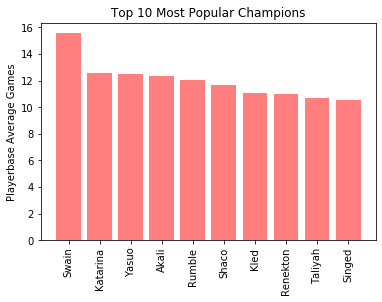

In [53]:
#Most popular champion
avg_2 = stack_df.groupby(stack_df["Champion"]).mean()
pop_champ = avg_2.sort_values(by=["Playerbase Avg. Games"],ascending = False)["Playerbase Avg. Games"]
top_10 = pop_champ.head(10)
top_10 = pd.DataFrame(top_10).reset_index()
x_axis = top_10["Champion"]
y_axis = top_10["Playerbase Avg. Games"]

plt.bar(x_axis, y_axis, color = 'r', alpha=0.5)
plt.title("Top 10 Most Popular Champions")
plt.ylabel("Playerbase Average Games")
plt.xticks(x_axis, rotation="vertical")
plt.show()